In [8]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [9]:
import numpy as np
import pandas as pd

In [10]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [18]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [19]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [20]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

In [21]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [22]:
# Save references to each table
measurement = Base.classes.measurement
station= Base.classes.station

In [23]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [38]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
Years = session.query(measurement)
for i in Years:
    print(i.date)


2010-01-01
2010-01-02
2010-01-03
2010-01-04
2010-01-06
2010-01-07
2010-01-08
2010-01-09
2010-01-10
2010-01-11
2010-01-12
2010-01-14
2010-01-15
2010-01-16
2010-01-17
2010-01-18
2010-01-19
2010-01-20
2010-01-21
2010-01-22
2010-01-23
2010-01-24
2010-01-25
2010-01-26
2010-01-27
2010-01-28
2010-01-30
2010-01-31
2010-02-01
2010-02-03
2010-02-04
2010-02-05
2010-02-06
2010-02-07
2010-02-08
2010-02-09
2010-02-11
2010-02-12
2010-02-13
2010-02-14
2010-02-15
2010-02-16
2010-02-17
2010-02-19
2010-02-20
2010-02-21
2010-02-22
2010-02-23
2010-02-24
2010-02-25
2010-02-26
2010-02-28
2010-03-01
2010-03-02
2010-03-03
2010-03-04
2010-03-05
2010-03-06
2010-03-07
2010-03-08
2010-03-09
2010-03-11
2010-03-12
2010-03-13
2010-03-14
2010-03-15
2010-03-17
2010-03-18
2010-03-21
2010-03-22
2010-03-23
2010-03-24
2010-03-26
2010-03-27
2010-03-28
2010-03-29
2010-03-30
2010-03-31
2010-04-01
2010-04-02
2010-04-03
2010-04-04
2010-04-05
2010-04-06
2010-04-08
2010-04-09
2010-04-10
2010-04-11
2010-04-12
2010-04-13
2010-04-15

2012-09-06
2012-09-07
2012-09-08
2012-09-09
2012-09-10
2012-09-11
2012-09-12
2012-09-13
2012-09-14
2012-09-15
2012-09-16
2012-09-17
2012-09-18
2012-09-19
2012-09-20
2012-09-22
2012-09-23
2012-09-24
2012-09-25
2012-09-26
2012-09-27
2012-09-28
2012-09-29
2012-09-30
2012-10-01
2012-10-02
2012-10-03
2012-10-04
2012-10-05
2012-10-06
2012-10-07
2012-10-08
2012-10-09
2012-10-10
2012-10-11
2012-10-12
2012-10-13
2012-10-14
2012-10-15
2012-10-16
2012-10-17
2012-10-18
2012-10-19
2012-10-20
2012-10-21
2012-10-22
2012-10-23
2012-10-24
2012-10-25
2012-10-26
2012-10-27
2012-10-28
2012-10-29
2012-10-30
2012-10-31
2012-11-01
2012-11-02
2012-11-03
2012-11-04
2012-11-05
2012-11-06
2012-11-07
2012-11-08
2012-11-09
2012-11-10
2012-11-11
2012-11-12
2012-11-13
2012-11-14
2012-11-15
2012-11-16
2012-11-17
2012-11-18
2012-11-19
2012-11-20
2012-11-21
2012-11-22
2012-11-23
2012-11-24
2012-11-25
2012-11-26
2012-11-27
2012-11-28
2012-11-29
2012-11-30
2012-12-01
2012-12-02
2012-12-03
2012-12-04
2012-12-05
2012-12-06

2017-08-09
2017-08-10
2017-08-11
2017-08-13
2017-08-14
2017-08-15
2017-08-16
2017-08-17
2017-08-18
2017-08-19
2017-08-20
2017-08-21
2017-08-23
2010-05-03
2010-05-04
2010-05-05
2010-05-06
2010-05-07
2010-05-10
2010-05-11
2010-05-12
2010-05-13
2010-05-14
2010-05-17
2010-05-18
2010-05-19
2010-05-20
2010-05-21
2010-05-25
2010-05-26
2010-05-27
2010-05-28
2010-06-01
2010-06-02
2010-06-03
2010-06-04
2010-06-07
2010-06-08
2010-06-09
2010-06-10
2010-06-15
2010-06-16
2010-06-17
2010-06-18
2010-06-21
2010-06-22
2010-06-23
2010-06-24
2010-06-25
2010-06-28
2010-06-29
2010-06-30
2010-07-01
2010-07-02
2010-07-06
2010-07-07
2010-07-08
2010-07-09
2010-07-14
2010-07-15
2010-07-16
2010-07-19
2010-07-20
2010-07-21
2010-07-22
2010-07-23
2010-08-02
2010-08-03
2010-08-04
2010-08-05
2010-08-06
2010-08-09
2010-08-10
2010-08-11
2010-08-12
2010-08-13
2010-08-16
2010-08-17
2010-08-18
2010-08-19
2010-08-23
2010-08-24
2010-08-25
2010-08-26
2010-08-27
2010-08-30
2010-08-31
2010-09-01
2010-09-02
2010-09-03
2010-09-07

2016-02-26
2016-02-27
2016-02-28
2016-02-29
2016-03-01
2016-03-02
2016-03-03
2016-03-04
2016-03-05
2016-03-06
2016-03-07
2016-03-08
2016-03-09
2016-03-10
2016-03-11
2016-03-12
2016-03-14
2016-03-16
2016-03-17
2016-03-18
2016-03-21
2016-03-22
2016-03-23
2016-03-24
2016-03-25
2016-03-26
2016-03-27
2016-03-28
2016-03-29
2016-03-30
2016-03-31
2016-04-01
2016-04-02
2016-04-03
2016-04-04
2016-04-06
2016-04-07
2016-04-08
2016-04-09
2016-04-10
2016-04-11
2016-04-12
2016-04-13
2016-04-14
2016-04-15
2016-04-16
2016-04-17
2016-04-18
2016-04-20
2016-04-21
2016-04-22
2016-04-23
2016-04-24
2016-04-25
2016-04-26
2016-04-27
2016-04-28
2016-04-29
2016-04-30
2016-05-01
2016-05-02
2016-05-03
2016-05-04
2016-05-05
2016-05-06
2016-05-07
2016-05-08
2016-05-09
2016-05-10
2016-05-11
2016-05-12
2016-05-13
2016-05-14
2016-05-15
2016-05-16
2016-05-17
2016-05-18
2016-05-19
2016-05-20
2016-05-21
2016-05-22
2016-05-23
2016-05-24
2016-05-25
2016-05-26
2016-05-27
2016-05-28
2016-05-29
2016-05-30
2016-05-31
2016-06-01

2013-05-30
2013-05-31
2013-06-01
2013-06-02
2013-06-03
2013-06-04
2013-06-05
2013-06-06
2013-06-07
2013-06-08
2013-06-09
2013-06-10
2013-06-11
2013-06-12
2013-06-13
2013-06-14
2013-06-15
2013-06-16
2013-06-17
2013-06-18
2013-06-19
2013-06-20
2013-06-21
2013-06-22
2013-06-23
2013-06-24
2013-06-25
2013-06-26
2013-06-27
2013-06-28
2013-06-29
2013-06-30
2013-07-01
2013-07-02
2013-07-03
2013-07-04
2013-07-05
2013-07-06
2013-07-07
2013-07-08
2013-07-09
2013-07-10
2013-07-11
2013-07-12
2013-07-13
2013-07-14
2013-07-15
2013-07-16
2013-07-17
2013-07-18
2013-07-19
2013-07-21
2013-07-22
2013-07-23
2013-07-24
2013-07-25
2013-07-26
2013-07-27
2013-07-28
2013-07-29
2013-07-30
2013-07-31
2013-08-01
2013-08-02
2013-08-03
2013-08-04
2013-08-05
2013-08-06
2013-08-07
2013-08-08
2013-08-09
2013-08-10
2013-08-11
2013-08-12
2013-08-13
2013-08-14
2013-08-15
2013-08-16
2013-08-17
2013-08-18
2013-08-19
2013-08-20
2013-08-21
2013-08-22
2013-08-23
2013-08-24
2013-08-25
2013-08-26
2013-08-27
2013-08-28
2013-08-29

In [39]:
# Calculate the date 1 year ago from the last data point in the database
last_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
last_date

('2017-08-23')

In [40]:
A_year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
A_year_ago

datetime.date(2016, 8, 23)

In [41]:
#Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= A_year_ago).\
    order_by(measurement.date).all()



precipitation_df = pd.DataFrame(precipitation_data, columns=["Date","Precipitation"])
precipitation_df.set_index("Date", inplace=True,)
precipitation_df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


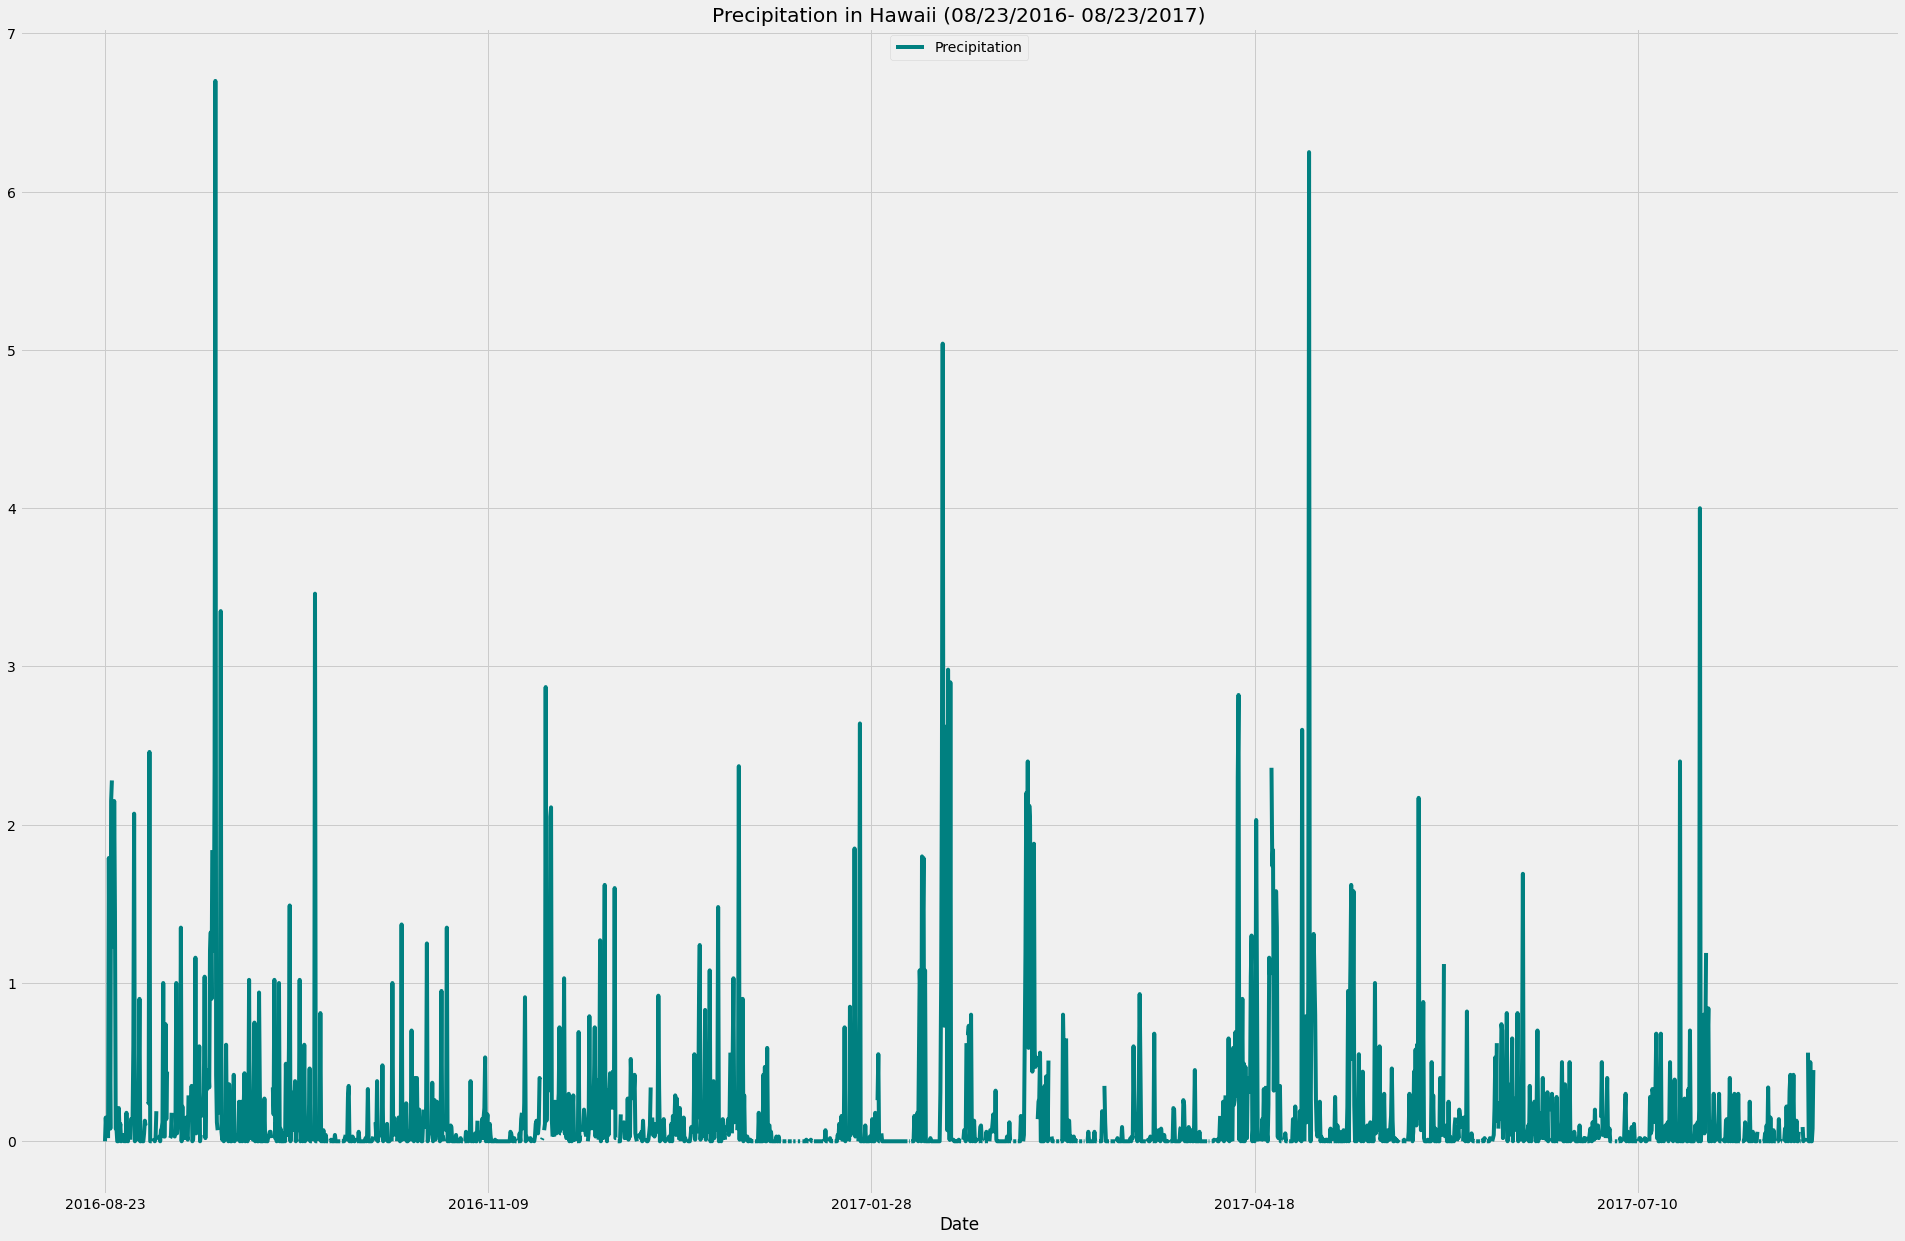

In [68]:
# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(title="Precipitation in Hawaii (08/23/2016- 08/23/2017)", figsize=(30,20), color = "teal")
plt.legend(loc='upper center')
plt.savefig("Images/precipitation.png")
plt.show()

In [47]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [48]:
# Design a query to show how many stations are available in this dataset?
total_station = session.query(measurement.station).distinct().count()
total_station

9

In [52]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
Most_active_stations = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
Most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [55]:
# Using the station id from the previous query, calculate the lowest temperature recorded, highest temperature recorded, and average temperature of the most active station?
sel = [func.min(measurement.tobs), 
       func.max(measurement.tobs), 
       func.avg(measurement.tobs)]

Lowest_highest_avg_temp = session.query(*sel).\
    filter(measurement.station == "USC00519281").all()
Lowest_highest_avg_temp

[(54.0, 85.0, 71.66378066378067)]

In [60]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs = session.query(measurement.tobs).\
    filter(measurement.date >= A_year_ago).\
    filter(measurement.station == "USC00519281").\
    order_by(measurement.date).all()

# Save the Query Results as a Pandas DataFrame
tobs_df = pd.DataFrame(tobs, columns=["Tobs"])
tobs_df
# Plot the Results as a Histogram with `bins=12`


,Tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


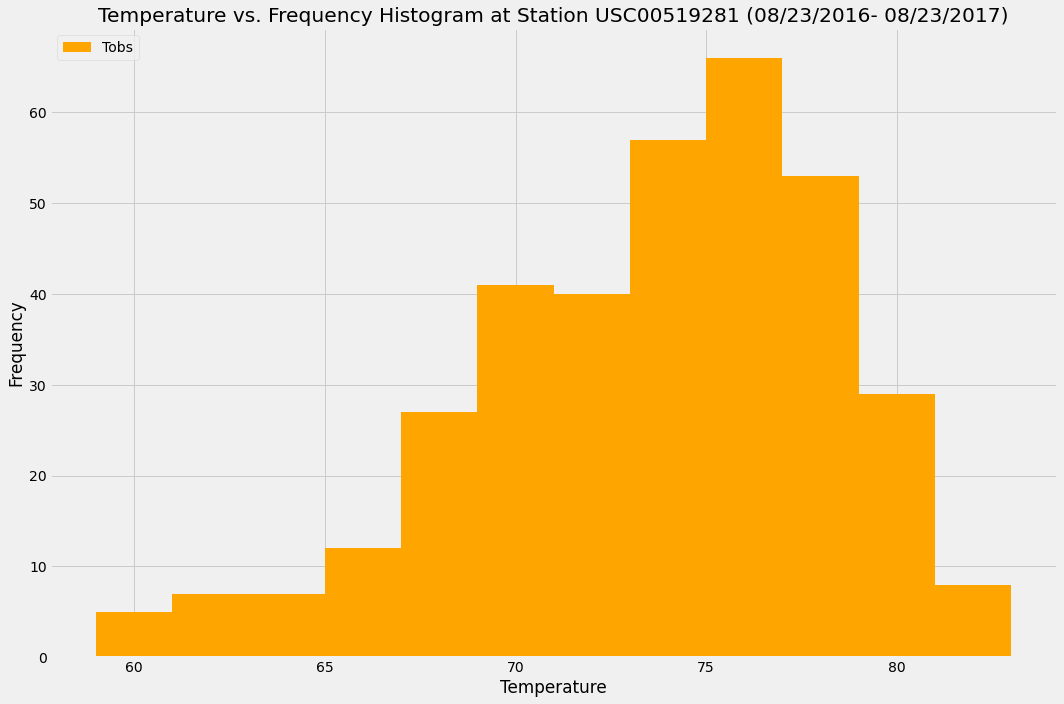

In [77]:
tobs_df.plot.hist(bins=12, title="Temperature vs. Frequency Histogram at Station USC00519281 (08/23/2016- 08/23/2017)", figsize=(15,10), color="orange")
plt.xlabel("Temperature")
plt.legend(loc="upper left")
plt.tight_layout()
plt.savefig("Images/temperature_vs_frequency.png")
plt.show()

## Bonus Challenge Assignment

In [79]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [80]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
my_trip = (calc_temps('2017-08-12', '2017-08-26'))
print(my_trip)

[(70.0, 78.72916666666667, 85.0)]


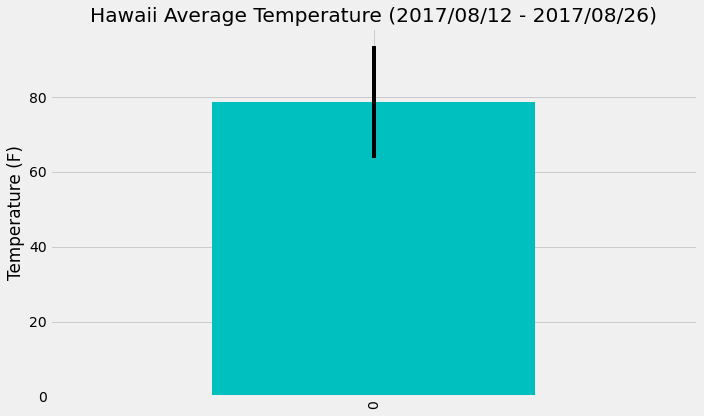

<Figure size 432x288 with 0 Axes>

In [110]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
mytrip_df = pd.DataFrame(my_trip, columns=['Min Temp', 'Average Temp', 'Max Temp'])

avg_df = mytrip_df['Average Temp']
min_df = mytrip_df['Min Temp']
max_df = mytrip_df['Max Temp']

ax=avg_df.plot(kind='bar', yerr=[max_df - min_df],  figsize=(10,6), title="Hawaii Average Temperature (2017/08/12 - 2017/08/26)", color='c') 
ax.set_ylabel("Temperature (F)")
plt.tight_layout()
plt.show()
plt.savefig("Hawaii Avg Temp.png")

plt.show()

In [90]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

sel = [measurement.station, func.avg(measurement.prcp), station.latitude, station.longitude, station.elevation]
trip_stations = session.query(*sel).filter(measurement.station == station.station).\
                filter(measurement.date >= "2017-08-12").\
                filter(measurement.date <= "2017-08-26").\
                group_by(measurement.station).all()

trip_stations

[('USC00514830', 0.0044444444444444444, 21.5213, -157.8374, 7.0),
 ('USC00516128', 0.3255555555555556, 21.3331, -157.8025, 152.4),
 ('USC00519281', 0.085, 21.45167, -157.84888999999998, 32.9),
 ('USC00519397', 0.002, 21.2716, -157.8168, 3.0),
 ('USC00519523', 0.0425, 21.33556, -157.71139, 19.5)]

In [91]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [94]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date
start_date = "08-12"
end_date = "08-26"

# Stip off the year and save a list of %m-%d strings
date_list = ["08-12", "08-13", "08-14", "08-15", "08-16", "08-17", "08-18", "08-19", "08-20", "08-21","08-22","08-23","08-24","08-25","08-26"]
daily_temp = []

# Loop through the list of %m-%d strings and calculate the normals for each date
for date in date_list:
    daily_temp.append(daily_normals(date))

daily_temp

[[(67.0, 76.52727272727273, 83.0)],
 [(71.0, 76.98245614035088, 84.0)],
 [(71.0, 76.77777777777777, 82.0)],
 [(69.0, 76.47169811320755, 83.0)],
 [(69.0, 76.08, 83.0)],
 [(69.0, 76.125, 83.0)],
 [(70.0, 76.92307692307692, 84.0)],
 [(69.0, 75.94642857142857, 85.0)],
 [(68.0, 76.45283018867924, 82.0)],
 [(67.0, 76.4, 83.0)],
 [(69.0, 76.47169811320755, 84.0)],
 [(67.0, 76.6923076923077, 87.0)],
 [(70.0, 75.96153846153847, 84.0)],
 [(69.0, 76.96078431372548, 82.0)],
 [(71.0, 76.56862745098039, 84.0)]]

In [103]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

daily_temp_df = pd.DataFrame(daily_temp, columns = ["Min Temperature", "Average Temperature", "Max Temperature"], index=pd.date_range(start='08-12-2017', end='08-26-2017', 
                                                   freq='D'))
daily_temp_df

,Min Temperature,Average Temperature,Max Temperature
2017-08-12,67.0,76.527273,83.0
2017-08-13,71.0,76.982456,84.0
2017-08-14,71.0,76.777778,82.0
2017-08-15,69.0,76.471698,83.0
2017-08-16,69.0,76.080000,83.0
2017-08-17,69.0,76.125000,83.0
2017-08-18,70.0,76.923077,84.0
2017-08-19,69.0,75.946429,85.0
2017-08-20,68.0,76.452830,82.0
2017-08-21,67.0,76.400000,83.0


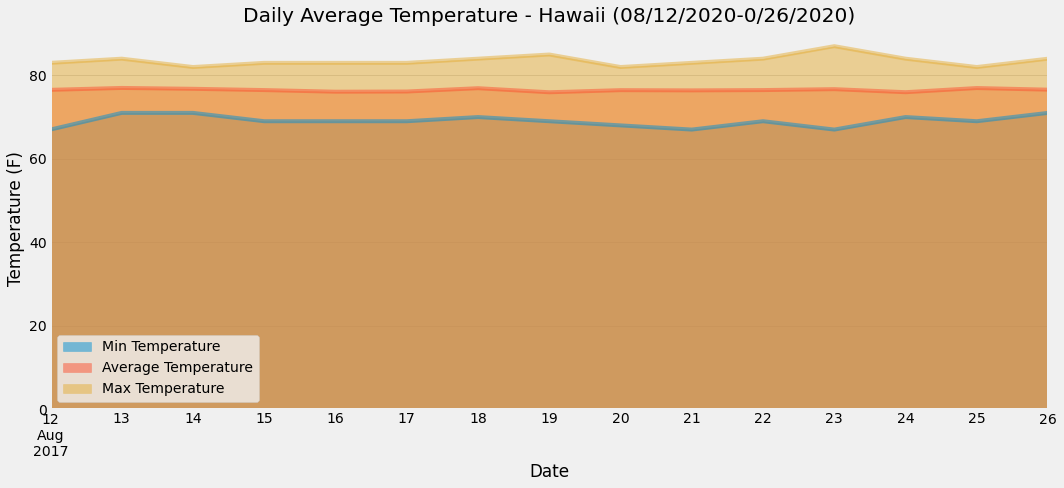

In [109]:
# Plot the daily normals as an area plot with `stacked=False`
ax=daily_temp_df.plot.area(stacked=False, figsize=(15,7), title ="Daily Average Temperature - Hawaii (08/12/2020-0/26/2020)")
ax.set_ylabel("Temperature (F)")
ax.set_xlabel("Date")
plt.tight_layout()
plt.show()

plt.show()